In [1]:
%matplotlib notebook
import astropy
import math
import numpy as np
import scipy as sp
#import lmfit
import csv
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib.artist as artists
from matplotlib.pyplot import savefig
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter 
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm
import matplotlib.colors as cl
import matplotlib.colorbar as colorbar
import scipy.optimize as optimization

In [2]:
lftrig = []

csvfile = '/Users/gemmaanderson/curtin_postdoc/triggering/low_freq_telescopes/LF_combined_for_plotting.csv'

with open(csvfile) as f:
    rdr = csv.reader(f)
    col_hdrs = rdr.next()
    for row in rdr:
        lftrig.append(row)
        
lftrig_dict = []
for row in lftrig:
        lftrig_dict.append(dict(zip(col_hdrs,row)))

In [5]:
print lftrig[9][0]


LOFAR_RT


In [6]:
# Start the Figure

#freqrange=[]

#fig, ax = plt.subplots()

fig = plt.figure(0)
plt.xscale('log')
plt.yscale('log')
plt.axis([0.8,2e4,5e-5,200])
plt.xlabel('Time post-GRB (s)')
plt.ylabel(r'Sensitivity (Jy/beam)')
# 256 colours

for b in lftrig_dict:
    freq=float(b['Freq_MHz'])
    freqrange.append(freq)

print freqrange

cb = cm.get_cmap("viridis")
norm = cl.Normalize(vmin=35, vmax=185)
colors = [cb(norm(value)) for value in freqrange]
print colors
#plt.colorbar()
#cbar = colorbar.ColorbarBase
#print colors

for d in lftrig_dict:
    name=d['Telescope']
    flag=d['Flag']
    time=float(d['Time_post_burst_s'])
    flux=float(d['Sensitivity_Jy'])
    exp=float(d['Timescale_s'])
    freq=float(d['Freq_MHz'])
    #nfreq= (freq - 35.) / (185. - 35.) 
    cfreq=[cb(norm(freq))]
#    print cfreq
    plt.plot(time,flux,linestyle=' ',marker='o', color=cfreq[0])
    #    plt.plot(time,flux,linestyle=' ',marker='o', color=cb(cfreq))
    plt.errorbar(time, flux, xerr=[[0],[exp]], capsize=2, ecolor=cfreq[0])
#    plt.colorbar(cmap=cb, norm=norm)

cax, _ = colorbar.make_axes(fig)
cbar = colorbar.ColorbarBase(cax, cmap=cb, norm=norm)
plt.colorbar()
#plt.colorbar(cmap=cb, norm=norm)

<IPython.core.display.Javascript object>

NameError: name 'freqrange' is not defined

In [7]:
nfreq

NameError: name 'nfreq' is not defined

In [9]:
print exp

NameError: name 'exp' is not defined

In [9]:
from astropy.io import ascii
telescopes = ascii.read('/Users/gemmaanderson/curtin_postdoc/triggering/low_freq_telescopes/LF_combined_for_plotting_v3.csv',delimiter=',')

In [10]:
telescopes

Telescope,Freq_MHz,Freq_MHz_real,Bandwidth_MHz,Time_post_burst_s,Response_swift_s,Timescale_s,Sensitivity_Jy,Flag,Reference,symbol
str16,float64,float64,float64,float64,float64,float64,float64,float64,str13,str1
MWA-150524A,132.5,132.5,2.56,23.0,11.0,4.0,3.0,1.0,Kaplan15,o
MWA-150524A,132.5,132.5,2.56,23.0,11.0,120.0,1.1,1.0,Kaplan15,o
MWA-150524A,132.5,132.5,2.56,23.0,11.0,1800.0,0.9,1.0,Kaplan15,o
MWA-180805A,185.0,185.0,30.72,83.0,19.0,0.5,0.3,1.0,ThisWork,o
MWA-180805A,185.0,185.0,30.72,83.0,19.0,28.0,0.1,1.0,ThisWork,o
MWA-180805A,185.0,185.0,30.72,83.0,19.0,120.0,0.05,1.0,ThisWork,o
MWA-180805A,185.0,185.0,30.72,83.0,19.0,1800.0,0.01,1.0,ThisWork,o
LOFAR_RT,150.0,150.0,48.0,240.0,240.0,1.0,0.0061,1.0,vanHaarlem13,s
LOFAR_RT,150.0,150.0,48.0,240.0,240.0,30.0,0.001116,1.0,vanHaarlem13,s


In [12]:
plt.figure(0)
norm = cl.Normalize(vmin=35, vmax=185)

#cfreq=[cb(norm(freq))]

cm = plt.cm.get_cmap('viridis')
plt.errorbar(telescopes['Time_post_burst_s'][telescopes['Flag']!=2],
             telescopes['Sensitivity_Jy'][telescopes['Flag']!=2],
             xerr=[np.zeros(len(telescopes[telescopes['Flag']!=2])),telescopes['Timescale_s'][telescopes['Flag']!=2]],
             fmt='.',ms=0, capsize=3, c='k',alpha=0.5)


sc = plt.scatter(telescopes['Time_post_burst_s'][:3],
                 telescopes['Sensitivity_Jy'][:3], 
                 c=telescopes['Freq_MHz_real'][:3], 
                 vmin=35, vmax=185, cmap=cm, zorder=10, marker='o', label='MWA-150424A')

plt.scatter(telescopes['Time_post_burst_s'][3:7],
                 telescopes['Sensitivity_Jy'][3:7], 
                 c=telescopes['Freq_MHz_real'][3:7], 
                 vmin=35, vmax=185, cmap=cm, zorder=10, marker='o', label='MWA-180805A')

plt.scatter(telescopes['Time_post_burst_s'][7:11],
            telescopes['Sensitivity_Jy'][7:11], 
            c=telescopes['Freq_MHz_real'][7:11], 
            vmin=35, vmax=185, cmap=cm, zorder=10, marker='s', label='LOFAR RT')

plt.scatter(telescopes['Time_post_burst_s'][11:14],
            telescopes['Sensitivity_Jy'][11:14], 
            c=telescopes['Freq_MHz_real'][11:14], 
            vmin=35, vmax=185, cmap=cm, zorder=10, marker='^', label='LWA1 PASI')

plt.scatter(telescopes['Time_post_burst_s'][14:18],
            telescopes['Sensitivity_Jy'][14:18], 
            c=telescopes['Freq_MHz_real'][14:18], 
            vmin=35, vmax=185, cmap=cm, zorder=10, marker='v', label='OVRO LWA-170112A')

plt.scatter(telescopes['Time_post_burst_s'][18:19],
            telescopes['Sensitivity_Jy'][18:19], 
            c=telescopes['Freq_MHz_real'][18:19], 
            vmin=35, vmax=185, cmap=cm, zorder=10, marker='d', label='AARTFAAC')

#MWA15 = Line2D(range(1), range(1), color=[cm(norm(telescopes['Freq_MHz_real']))], marker='o',linestyle=' ')
MWA15 = Line2D(range(1), range(1), color='lightseagreen', marker='o',linestyle=' ')
MWA18 = Line2D(range(1), range(1), color='gold', marker='o',linestyle=' ')
lofar = Line2D(range(1), range(1), color='limegreen', marker='s',linestyle=' ')
lwa1 = Line2D(range(1), range(1), color='mediumblue', marker='^',linestyle=' ')
ovrolwa = Line2D(range(1), range(1), color='darkslateblue', marker='v',linestyle=' ')
aartfaac = Line2D(range(1), range(1), color='rebeccapurple', marker='d',linestyle=' ')
mwathermal = Line2D(range(1), range(1), color='black',linestyle='--')
lofar2h = Line2D(range(1), range(1), color='black',linestyle=':')

#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

        
#leg = plt.legend([MWA15, MWA18, lofar, lwa1, ovrolwa, aartfaac, mwathermal, lofar2h],
#                 ["MWA-150524A", "MWA-180805A", "LOFAR RT", "LWA1 PASI", "OVRO LWA-170112A", 
#                  "AARTFAAC","MWA Thermal","LOFAR 2hr"], prop={'size': 6}, loc='upper right') 

leg = plt.legend([MWA15, MWA18, lofar, lwa1, ovrolwa, aartfaac, mwathermal, lofar2h],
                 ["MWA-150524A", "MWA-180805A", "LOFAR RT", "LWA1 PASI", "OVRO LWA-170112A", 
                  "AARTFAAC"], prop={'size': 6}, loc='upper right') 

plt.hlines(0.002, 0.8, 2e4, linestyles='--')
plt.hlines(7.201e-05, 0.8, 2e4, linestyles=':')
#plt.hlines(0.0080, 0.8, 2e4, linestyles='-.')

# GCN alert delay
# GRB 150424A
plt.vlines(13, 5e-5, 200, color='lightseagreen',linestyles=':')
# GRB 180805A
plt.vlines(64, 5e-5, 200, color='gold',linestyles=':')
# For 185 MHz at z = 0.7
plt.vlines(120, 5e-5, 200, color='gold',linestyles='--')
# For 150 MHz at z = 0.7
plt.vlines(180, 5e-5, 200, color='limegreen',linestyles='--')
# For 132.5 MHz at z=0.7
plt.vlines(230, 5e-5, 200, color='lightseagreen',linestyles='--')

# For 185 MHz at 40 Mpc
#plt.vlines(7, 5e-5, 200, color='gold',linestyles='--')
# For 150 MHz at 40 Mpc
#plt.vlines(11, 5e-5, 200, color='limegreen',linestyles='--')
# For 132.5 MHz at 40 Mpc
#plt.vlines(14, 5e-5, 200, color='lightseagreen',linestyles='--')

cbar = plt.colorbar(sc, label=r'Frequency (MHz)')

plt.xscale('log')
plt.yscale('log')
plt.axis([0.8,3e3,5e-5,200])
plt.xlabel('Time post-GRB (s)')
plt.ylabel(r'Sensitivity (Jy/beam)')

plt.savefig('lf_comp_07_swift_lessleg.png', format='png', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.savefig('lf_comp_07_swift_lessleg.pdf', format='pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


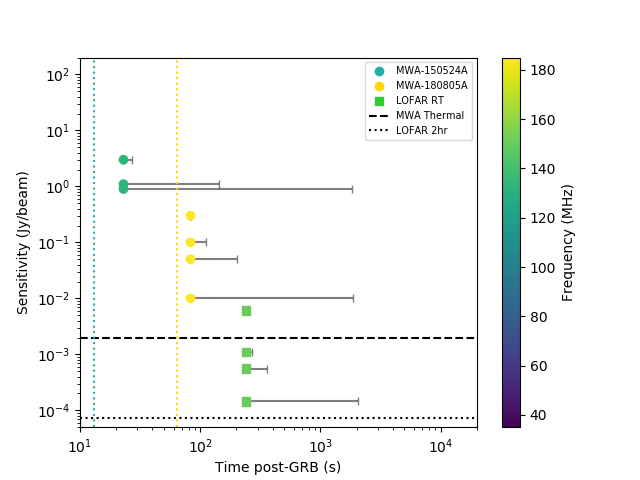

Text(0,0.5,'Sensitivity (Jy/beam)')

In [13]:
plt.figure(1)
norm = cl.Normalize(vmin=35, vmax=185)

#cfreq=[cb(norm(freq))]

cm = plt.cm.get_cmap('viridis')
plt.errorbar(telescopes['Time_post_burst_s'][telescopes['Flag']==1],
             telescopes['Sensitivity_Jy'][telescopes['Flag']==1],
             xerr=[np.zeros(len(telescopes[telescopes['Flag']==1])),telescopes['Timescale_s'][telescopes['Flag']==1]],
             fmt='.',ms=0, capsize=3, c='k',alpha=0.5)


sc = plt.scatter(telescopes['Time_post_burst_s'][:3],
                 telescopes['Sensitivity_Jy'][:3], 
                 c=telescopes['Freq_MHz_real'][:3], 
                 vmin=35, vmax=185, cmap=cm, zorder=10, marker='o', label='MWA-150424A')

plt.scatter(telescopes['Time_post_burst_s'][3:7],
                 telescopes['Sensitivity_Jy'][3:7], 
                 c=telescopes['Freq_MHz_real'][3:7], 
                 vmin=35, vmax=185, cmap=cm, zorder=10, marker='o', label='MWA-180805A')

plt.scatter(telescopes['Time_post_burst_s'][7:11],
            telescopes['Sensitivity_Jy'][7:11], 
            c=telescopes['Freq_MHz_real'][7:11], 
            vmin=35, vmax=185, cmap=cm, zorder=10, marker='s', label='LOFAR RT')

#plt.scatter(telescopes['Time_post_burst_s'][11:14],
#            telescopes['Sensitivity_Jy'][11:14], 
#            c=telescopes['Freq_MHz_real'][11:14], 
#            vmin=35, vmax=185, cmap=cm, zorder=10, marker='^', label='LWA1 PASI')

#plt.scatter(telescopes['Time_post_burst_s'][14:18],
#            telescopes['Sensitivity_Jy'][14:18], 
#            c=telescopes['Freq_MHz_real'][14:18], 
#            vmin=35, vmax=185, cmap=cm, zorder=10, marker='v', label='OVRO LWA-170112A')

#plt.scatter(telescopes['Time_post_burst_s'][18:19],
#            telescopes['Sensitivity_Jy'][18:19], 
#            c=telescopes['Freq_MHz_real'][18:19], 
#            vmin=35, vmax=185, cmap=cm, zorder=10, marker='d', label='AARTFAAC')

#MWA15 = Line2D(range(1), range(1), color=[cm(norm(telescopes['Freq_MHz_real']))], marker='o',linestyle=' ')
MWA15 = Line2D(range(1), range(1), color='lightseagreen', marker='o',linestyle=' ')
MWA18 = Line2D(range(1), range(1), color='gold', marker='o',linestyle=' ')
lofar = Line2D(range(1), range(1), color='limegreen', marker='s',linestyle=' ')
#lwa1 = Line2D(range(1), range(1), color='mediumblue', marker='^',linestyle=' ')
#ovrolwa = Line2D(range(1), range(1), color='darkslateblue', marker='v',linestyle=' ')
#aartfaac = Line2D(range(1), range(1), color='rebeccapurple', marker='d',linestyle=' ')
mwathermal = Line2D(range(1), range(1), color='black',linestyle='--')
lofar2h = Line2D(range(1), range(1), color='black',linestyle=':')

#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

        
leg = plt.legend([MWA15, MWA18, lofar, mwathermal, lofar2h],
                 ["MWA-150524A", "MWA-180805A", "LOFAR RT","MWA Thermal","LOFAR 2hr"], prop={'size': 7}, loc='upper right') 

plt.hlines(0.002, 10, 2e4, linestyles='--')
plt.hlines(7.201e-05, 10, 2e4, linestyles=':')
#plt.hlines(0.0080, 10, 2e4, linestyles='-.')

plt.vlines(13, 5e-5, 200, color='lightseagreen',linestyles=':')
plt.vlines(64, 5e-5, 200, color='gold',linestyles=':')

cbar = plt.colorbar(sc, label=r'Frequency (MHz)')

plt.xscale('log')
plt.yscale('log')
plt.axis([10,2e4,5e-5,200])
plt.xlabel('Time post-GRB (s)')
plt.ylabel(r'Sensitivity (Jy/beam)')

In [176]:
telescopes['Freq_MHz_real']

132.5
132.5
132.5
185.0
185.0
185.0
185.0
150.0
150.0
150.0
150.0
